In [196]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

## Process text file

In [197]:
file=open("StressPerm.txt","r")
file.readlines()

['sig (GPa) sig1      epsX            epsXY  epsXZ  epsYX  epsY            epsYZ  epsZX  epsZY  epsZ           \n',
 '-0.5      -0.499998 45.4612         1.75   10.93  1.75   27.2429         0.92   10.93  0.92   26.0723        \n',
 '0.0       0.000000  32.9109         -0.38  3.21   -0.38  24.2431         1.36   3.21   1.36   22.9024        \n',
 '0.5       0.499998  38.9538         1.67   7.69   1.67   29.2030         2.40   7.69   2.40   25.4958        \n']

In [198]:
stress=[]
eps=[]
file=open("StressPerm.txt","r")
for line in file.readlines()[1:]:
    spline=line.split()
    stress.append(float(spline[1]) )
    # Impose Voight notation.
    eps.append([float(spline[2]), float(spline[6]),float(spline[10]),float(spline[7]),float(spline[4]),float(spline[5])])
    
print(f'{"Sig1 (GPa)":14} {"eps1":10} {"eps2":10} {"eps3":10} {"eps4":10} {"eps5":10} {"eps6":10}')
for i, struss in enumerate(stress):
    print(f"{struss:<14.6} {eps[i][0]:<10.6} {eps[i][1]:<10.6} {eps[i][2]:<10.6} {eps[i][3]:<10.6} {eps[i][4]:<10.6} {eps[i][5]:<10.6}")

Sig1 (GPa)     eps1       eps2       eps3       eps4       eps5       eps6      
-0.499998      45.4612    27.2429    26.0723    0.92       10.93      1.75      
0.0            32.9109    24.2431    22.9024    1.36       3.21       -0.38     
0.499998       38.9538    29.203     25.4958    2.4        7.69       1.67      


In [199]:
eps_plat = [[ep[j] for ep in eps] for j in range(6)]
eps_plat

[[45.4612, 32.9109, 38.9538],
 [27.2429, 24.2431, 29.203],
 [26.0723, 22.9024, 25.4958],
 [0.92, 1.36, 2.4],
 [10.93, 3.21, 7.69],
 [1.75, -0.38, 1.67]]

## Plot permitivities vs Stress

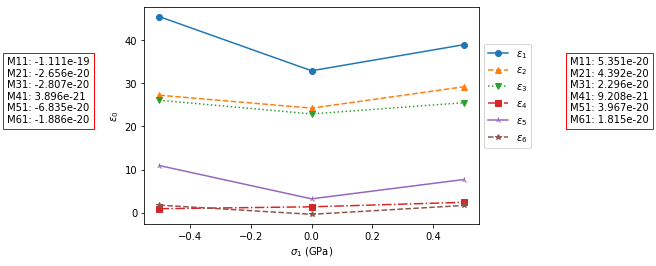

In [216]:
#eps1=[i[0] for i in eps]; eps2=[i[1] for i in eps] ; eps3=[i[2] for i in eps]
#eps4=[i[3] for i in eps]; eps5=[i[4] for i in eps] ; eps6=[i[5] for i in eps]
eps_plt=[[ep[j] for ep in eps] for j in range(6)]


fmt=["o-",'^--','v:','s-.','2-','*--']
for i, ep in enumerate(eps_plt):
    plt.plot(stress,ep,fmt[i], label=f'$\epsilon_{i+1}$')
plt.legend(bbox_to_anchor=(1.0, 0.85));
plt.xlabel("$\sigma_1$ (GPa)");
plt.ylabel("$\epsilon_0$");

strang=""
strung=""
for i in range(6):
    Mi1_l = (1/2)*(epsDf.iloc[1,i] - epsDf.iloc[0,i]) / (sig.iloc[1]-sig.iloc[0])
    Mi1_r = (1/2)*(epsDf.iloc[2,i] - epsDf.iloc[1,i]) / (sig.iloc[2]-sig.iloc[1])
    strang+=f"M{i+1}{1}: {Mi1_l[0]*eps_free/10**9:8.3e}\n"
    strung+=f"M{i+1}{1}: {Mi1_r[0]*eps_free/10**9:8.3e}\n"
plt.text(-1,   20.9, strang.rstrip('\n'), bbox=dict(fill=False, edgecolor='red', linewidth=1));
plt.text(0.85, 20.9, strung.rstrip('\n'), bbox=dict(fill=False, edgecolor='red', linewidth=1));

## Fit for Electrostriction

In [203]:
eps_free=8.85418782e-12
sig=pd.DataFrame(data=stress,columns=["stress"])
epsDf=pd.DataFrame(data=eps, columns=["eps1","eps2","eps3","eps4","eps5","eps6"])
display(sig)
display(sig.iloc[0:2])
display(epsDf.iloc[0:2,0])
display(epsDf)

,stress
0,-0.499998
1,0.000000
2,0.499998


,stress
0,-0.499998
1,0.000000


0    45.4612
1    32.9109
Name: eps1, dtype: float64

,eps1,eps2,eps3,eps4,eps5,eps6
0,45.4612,27.2429,26.0723,0.92,10.93,1.75
1,32.9109,24.2431,22.9024,1.36,3.21,-0.38
2,38.9538,29.2030,25.4958,2.40,7.69,1.67


In [ ]:
sig.iloc[0]

In [ ]:
fat=LinearRegression().fit(sig.iloc[0:2],y=epsDf.iloc[0:2,0])
print(fat.intercept_)
print(fat.coef_/2)

In [ ]:
M11= (epsDf.iloc[0,0] - epsDf.iloc[1,0]) / (2*sig.iloc[0])
print(f"M{1}{1} in eps_f/GPa {M11[0]}")
print(f"M{1}{1} in S.I. {M11[0]*eps_free/10**9}")

In [ ]:
for i in range(6):
    Mi1 = (1/2)*(epsDf.iloc[1,i] - epsDf.iloc[0,i]) / (sig.iloc[1]-sig.iloc[0])
    #print(f"M{i}{1} in eps_f/GPa {Mi1[0]}")
    print(f"M{i+1}{1}: {Mi1[0]*eps_free/10**9}")

In [ ]:
for i in range(6):
    Mi1 = (1/2)*(epsDf.iloc[2,i] - epsDf.iloc[1,i]) / (sig.iloc[2]-sig.iloc[1])
    #print(f"M{i}{1} in eps_f/GPa {Mi1[0]}")
    print(f"M{i+1}{1}: {Mi1[0]*eps_free/10**9}")

eps01=26.59730458
eta=0.0375978
eps_free=8.85418782e-12

Fit dielectric constant to stress
f(x)= eps01*eps_free + 2*x*Mh
fit f(x) "<(sed -n '/^-0\.001/,/^0\.001/p' PhonAndDielec_Anaddb.txt)" using ($2*10**9):($8*eps_free) via Mh

g(x)= eta/eps_free - 2*x*Qh
fit g(x) "<(sed -n '/^-0\.001/,/^0\.001/p' PhonAndDielec_Anaddb.txt)" using ($2*10**9):(1 / ($8*eps_free) ) via Qh